In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
   
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
# for i in train_samples:
#     print(i)

In [5]:
# for i in train_labels:
#     print(i)

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs available: ', len(physical_devices))

Num GPUs available:  0


In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6995 - accuracy: 0.5037 - val_loss: 0.6849 - val_accuracy: 0.5048
Epoch 2/30
189/189 - 0s - loss: 0.6672 - accuracy: 0.5974 - val_loss: 0.6578 - val_accuracy: 0.6048
Epoch 3/30
189/189 - 0s - loss: 0.6308 - accuracy: 0.7101 - val_loss: 0.6207 - val_accuracy: 0.7143
Epoch 4/30
189/189 - 0s - loss: 0.5925 - accuracy: 0.7513 - val_loss: 0.5831 - val_accuracy: 0.7571
Epoch 5/30
189/189 - 0s - loss: 0.5532 - accuracy: 0.7873 - val_loss: 0.5412 - val_accuracy: 0.7762
Epoch 6/30
189/189 - 1s - loss: 0.5062 - accuracy: 0.8291 - val_loss: 0.4899 - val_accuracy: 0.8333
Epoch 7/30
189/189 - 0s - loss: 0.4629 - accuracy: 0.8667 - val_loss: 0.4521 - val_accuracy: 0.8429
Epoch 8/30
189/189 - 0s - loss: 0.4254 - accuracy: 0.8820 - val_loss: 0.4148 - val_accuracy: 0.8667
Epoch 9/30
189/189 - 0s - loss: 0.3952 - accuracy: 0.8963 - val_loss: 0.3894 - val_accuracy: 0.8667
Epoch 10/30
189/189 - 0s - loss: 0.3706 - accuracy: 0.8974 - val_loss: 0.3663 - val_accuracy: 0.8667

In [14]:
test_labels = []
test_samples = []

In [15]:
for i in range(10):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
  
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)


In [17]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [18]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [19]:
for i in predictions:
    print(i)

[0.16109625 0.8389037 ]
[0.41879869 0.58120126]
[0.975305   0.02469497]
[0.08003405 0.9199659 ]
[0.04751011 0.9524899 ]
[0.9268643  0.07313565]
[0.7000947  0.29990533]
[0.34942442 0.65057564]
[0.49154013 0.50845987]
[0.9638319  0.03616807]
[0.05664035 0.9433597 ]
[0.7300115  0.26998845]
[0.12521364 0.8747864 ]
[0.08614334 0.9138566 ]
[0.04221921 0.9577808 ]
[0.97401106 0.02598891]
[0.28588894 0.71411103]
[0.03134779 0.96865225]
[0.45492887 0.5450711 ]
[0.41879869 0.58120126]
[0.96656936 0.03343063]
[0.41879869 0.58120126]
[0.95319813 0.04680184]
[0.9689734  0.03102661]
[0.02780424 0.9721958 ]
[0.9424857  0.05751434]
[0.9487257  0.05127433]
[0.49154013 0.50845987]
[0.06740101 0.932599  ]
[0.03978958 0.96021044]
[0.97523856 0.02476142]
[0.96068484 0.03931516]
[0.06740101 0.932599  ]
[0.0534271  0.94657296]
[0.883212   0.11678804]
[0.9487257  0.05127433]
[0.28588894 0.71411103]
[0.5646414  0.43535852]
[0.9753736  0.02462642]
[0.9752526  0.02474736]
[0.49154013 0.50845987]
[0.97476315 0.02

In [20]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [21]:
for i in rounded_predictions:
    print(i)

1
1
0
1
1
0
0
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
0
0
1
0
0
1
1
1
0
0
1
1
0
0
1
0
0
0
1
0
1
1
1
0
1
1
1
1
1
1
1
0
0
0
1
1
0
0
1
0
0
1
0
1
1
0
0
1
0
1
1
1
1
0
0
0
0
1
0
1
0
1
1
1
0
1
1
0
0
1
1
0
0
1
0
0
1
0
1
0
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
0
1
1
1
1
1
0
0
0
0
0
0
1
1
1
0
0
0
0
1
0
1
1
1
0
1
0
0
0
1
0
1
1
0
1
0
0
0
0
0
1
1
0
0
1
0
0
0
1
1
0
1
1
1
0
0
0
0
1
1
1
0
1
1
1
0
0
1
1
0
0
1
0
1
0
1
0
0
1
0
1
0
0
0
0
1
1
1
1
0
0
1
0
0
1
0
1
0
0
1
0
1
0
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
0
0
0
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
1
0
1
0
0
1
1
0
1
0
0
0
0
0
1
0
0
1
0
0
1
1
1
1
0
1
1
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
1
1
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
1
0
1
0
1
0
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
0
0
0
1
0
1
0
0
0
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
0
0
0
1
1
1
1
0


In [22]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [23]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [24]:
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('normalized confusion matrix')
    else:
        print('confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center',
                  color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confusion matrix, without normalization
[[192  18]
 [ 10 200]]


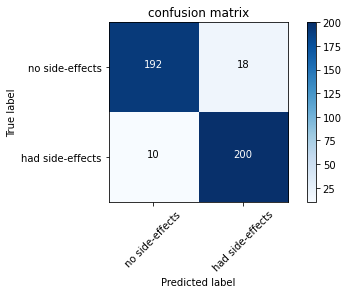

In [25]:
cm_plot_labels = ['no side-effects', 'had side-effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [27]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [28]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [29]:
new_model.get_weights()

[array([[ 0.45975748,  0.67710674, -0.49234998,  0.41219977,  0.44723526,
          0.33134186,  0.5007512 ,  0.5914982 , -0.09847289,  0.53340274,
         -0.32873973, -0.44136375,  0.48245367,  0.37384805,  0.7349936 ,
         -0.5473366 ]], dtype=float32),
 array([ 0.25638413, -0.30432588,  0.        , -0.03667409, -0.23827487,
        -0.17686705, -0.26658875, -0.26367614,  0.        , -0.28156403,
         0.        ,  0.        ,  0.2811872 , -0.20030792, -0.10408958,
         0.        ], dtype=float32),
 array([[-0.20012513, -0.21340322,  0.20671771, -0.24690613,  0.297546  ,
          0.19413573,  0.37453184,  0.32159021,  0.23741595,  0.2710711 ,
         -0.01018244, -0.12696572,  0.24420592,  0.15339331,  0.21417163,
         -0.30877203, -0.11588883,  0.17534226, -0.24683908,  0.0440525 ,
         -0.2473945 ,  0.07720992,  0.16071573,  0.34866914,  0.06050693,
         -0.21311362, -0.14842813,  0.24612176,  0.08247207,  0.29256704,
          0.01227805, -0.35235044],
 

In [30]:
new_model.optimizer

### model.to_json - only architecture not weights nor training configuration

In [31]:
json_string = model.to_json()

In [32]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [33]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [34]:
model_architecture.summary() # only the architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### model.save_weights(

In [35]:
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [36]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

#### weights into a new model

In [37]:
model2.load_weights('models/my_model_weights.h5')

In [38]:
model2.get_weights()

[array([[ 0.62169534,  0.5529647 ,  0.23923786,  0.4857337 , -0.5198245 ,
         -0.09545237, -0.16552255, -0.13899347,  0.23452306, -0.45529735,
          0.49003544,  0.72344476,  0.19930862, -0.07618397, -0.516565  ,
         -0.5015638 ]], dtype=float32),
 array([ 0.28446525, -0.1179052 , -0.08826334, -0.15270607,  0.        ,
         0.        ,  0.        ,  0.        , -0.08642226,  0.        ,
        -0.13039404, -0.16203915, -0.06245604,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 1.18483149e-01, -3.59557085e-02, -3.11708987e-01,
          2.75766253e-01, -1.27025366e-01,  2.88166821e-01,
         -3.17284852e-01,  2.13171110e-01,  1.96931019e-01,
          2.73474544e-01, -1.18869290e-01, -1.11284345e-01,
          4.17927831e-01,  6.94984719e-02,  1.03459463e-01,
         -5.85171096e-02, -3.39402735e-01, -1.75179139e-01,
          1.61559016e-01,  1.95636734e-01,  3.21709037e-01,
          1.49170354e-01, -2.44890973e-01,  2.13590041e-01,
 